### add column 

In [103]:
def add_cols(jpath, fpath, cols):
    jpath = '../data/pd_gy/all.json'
    fpath = 'filter0.csv'

    add_cols = ['age','gender']

    import json 
    with open(jpath,'r') as f:
        dj = json.load(f)

    import pandas as pd
    op = pd.read_csv(fpath)

    op = op.rename(columns = {'성별':'gender','나이':'age','KEY':'key'})
    op['key'] = op.key.astype('str')

    l = []
    for i,val in enumerate(dj):
        key  = val['key']
        item = op[op.key==key]
        for col in add_cols:
            col_value = item[col].values[0]
            dj[i][col] = col_value
    return dj

In [124]:
jpath = '../data/pd_gy/all.json'
fpath = 'filter0.csv'

import json 
with open(jpath,'r') as f:
    dj = json.load(f)

import pandas as pd
op = pd.read_csv(fpath)

op = op.rename(columns = {'성별':'gender','나이':'age','KEY':'key'})
op['key'] = op.key.astype('str')

l = []
for i,val in enumerate(dj):
    key  = val['key']
    item = op[op.key==key]
    age = int(item['age'].values[0])
    gender = str(item['gender'].values[0])
    dj[i]['age'], dj[i]['gender'] = age, gender.lower()

In [126]:
import json
with open('../data/pd_gy/all_1.json','w') as f:
    json.dump(dj,f)

### 3 hold out 

In [1]:
jpath = '../data/pd_gy/all_1.json'

import json
with open(jpath, 'r') as f:
    jf = json.load(f)

In [2]:
from utils import num2class

for i,val in enumerate(jf):
    jf[i]['nrs_2'] = num2class(val['nrs'])

In [15]:
import pandas as pd

from sklearn.model_selection import train_test_split

# train:val:test = 3:1:1
nrs2_0 = pd.DataFrame(jf)['nrs_2']
xtr, xte= train_test_split(jf, test_size=0.2, shuffle=True, stratify=nrs2_0, random_state=34)
nrs2_1 = pd.DataFrame(xtr)['nrs_2']
xtr, xval= train_test_split(xtr, test_size=0.25, shuffle=True, stratify=nrs2_1, random_state=34)

In [ ]:
with open('../data/pd_gy/train.json','w') as f:
    json.dump(xtr,f)
with open('../data/pd_gy/val.json','w') as f:
    json.dump(xval,f)
with open('../data/pd_gy/test.json','w') as f:
    json.dump(xte,f)

### Only General Anesthesia 

In [1]:
import json
with open('../data/pd_gy/all_1.json','r') as f:
    jf = json.load(f)

In [6]:
keys = [int(s['key']) for s in jf]

In [2]:
op0p = './data/수술기본_과거력_21상.xlsx'
op1p = './data/수술기본_과거력_21하.xlsx'
op2p = './data/수술기본_과거력_22상.xlsx'

import pandas as pd

op0 = pd.read_excel(op0p, engine='openpyxl',header=1).rename(columns={'Unnamed: 0':'key'})
op1 = pd.read_excel(op1p, engine='openpyxl',header=1).rename(columns={'Unnamed: 0':'key'})
op2 = pd.read_excel(op2p, engine='openpyxl',header=1).rename(columns={'Unnamed: 0':'key'})

In [8]:
op0 = op0[op0.key.isin(keys)]
op1 = op1[op1.key.isin(keys)]
op2 = op2[op2.key.isin(keys)]

In [9]:
op = pd.concat([op0,op1,op2])

In [14]:
op[['마취종류']].value_counts()

마취종류      
General       1109
Spinal         188
MAC             63
General 전환       7
dtype: int64

In [165]:
op[['수술명']].value_counts().to_csv('./data/surgery.csv')

In [166]:
op[['수술 전 진단']].value_counts().to_csv('./data/pre-op-diagnosis.csv')

In [139]:
len(op0[op0.KEY.isin(keys)])+len(op1[op1.KEY.isin(keys)])+len(op2[op2.KEY.isin(keys)])

1766

In [132]:
keys= []
for samp in jf:
    keys.append(samp['key'])

### PPG 

In [16]:
jpath = '../data/pd_gy/all_1.json'
root_dir = '../data/pd_gy/'
import json 
with open(jpath,'r') as f:
    jf = json.load(f)

In [17]:
from utils import num2class
for i,val in enumerate(jf):
    jf[i]['nrs_2'] = num2class(val['nrs'])

In [18]:
import os

idx = 7
recp = jf[idx]['rec_path'][0].replace('\\','/')
recp = os.path.join(root_dir,recp)
orp = jf[idx]['or_path'][0].replace('\\','/')
orp = os.path.join(root_dir, orp)

# VitalFile Freq. ?
import vitaldb
import os
trks = vitaldb.vital_trks(recp)

In [21]:
trks

['Intellivue/ECG_HR',
 'Intellivue/PLETH_SAT_O2',
 'Intellivue/PLETH_HR',
 'Intellivue/PLETH_PERF_REL',
 'Intellivue/ECG_II',
 'Intellivue/PLETH',
 'Intellivue/NIBP_SYS',
 'Intellivue/NIBP_DIA',
 'Intellivue/NIBP_MEAN',
 'Intellivue/NIBP_HR',
 'Intellivue/RR',
 'Intellivue/ST_II']

In [19]:
vf = vitaldb.VitalFile(recp)

In [24]:
ppg = vf.to_numpy('Intellivue/PLETH',1)
nibp = vf.to_numpy('Intellivue/NIBP_SYS',1)

In [34]:
first_idx = 0 
for i, value in enumerate(ppg):
    if pd.isna(value):
        continue
    else:
        first_idx = i
        break

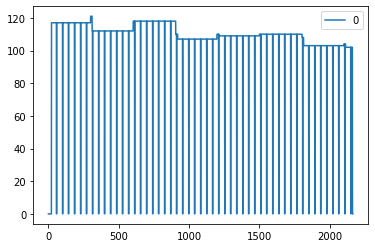

In [31]:
import numpy as np
pd.DataFrame(nibp).replace({np.nan:0}).plot()

In [167]:
trks

['Intellivue/ECG_HR',
 'Intellivue/PLETH_SAT_O2',
 'Intellivue/PLETH_HR',
 'Intellivue/PLETH_PERF_REL',
 'Intellivue/ECG_II',
 'Intellivue/PLETH',
 'Intellivue/NIBP_SYS',
 'Intellivue/NIBP_DIA',
 'Intellivue/NIBP_MEAN',
 'Intellivue/NIBP_HR',
 'Intellivue/RR',
 'Intellivue/ST_II']

In [107]:
nibpc

['Intellivue/NIBP_SYS',
 'Intellivue/NIBP_DIA',
 'Intellivue/NIBP_MEAN',
 'Intellivue/NIBP_HR']

In [88]:
vf = vitaldb.VitalFile(recp,nibpc)

In [108]:
sams= vf.get_track_samples(nibpc[0],1)

In [111]:
pd.DataFrame(sams).value_counts()

110.0    322
118.0    295
112.0    285
109.0    282
103.0    280
107.0    273
117.0    272
102.0     48
121.0     11
104.0     11
108.0     10
dtype: int64

In [105]:
trks

['Intellivue/ECG_HR',
 'Intellivue/PLETH_SAT_O2',
 'Intellivue/PLETH_HR',
 'Intellivue/PLETH_PERF_REL',
 'Intellivue/ECG_II',
 'Intellivue/PLETH',
 'Intellivue/NIBP_SYS',
 'Intellivue/NIBP_DIA',
 'Intellivue/NIBP_MEAN',
 'Intellivue/NIBP_HR',
 'Intellivue/RR',
 'Intellivue/ST_II']

In [ ]:
# PPG DT
or_ppg = get_ppg(pdorp,period='or')
or_ppg = preprocess(or_ppg)

rec_ppg = get_ppg(pdorp,period='rec')
rec_ppg = preprocess(rec_ppg)


In [ ]:
# final goal
import torch
from dataset import PPGDT

trdt  = PPGDT(op_path= '../data/vital2/dd_all_simple_train.csv')
tedt  = PPGDT(op_path= '../data/vital2/dd_all_simple_test.csv')

trdl  = torch.utils.data.DataLoader(trdt, batch_size=4)
tedl  = torch.utils.data.DataLoader(tedt, batch_size=4)

In [87]:
nibpc =['Intellivue/NIBP_SYS','Intellivue/NIBP_DIA','Intellivue/NIBP_MEAN','Intellivue/NIBP_HR']

In [86]:
trks

['Intellivue/ECG_HR',
 'Intellivue/PLETH_SAT_O2',
 'Intellivue/PLETH_HR',
 'Intellivue/PLETH_PERF_REL',
 'Intellivue/ECG_II',
 'Intellivue/PLETH',
 'Intellivue/NIBP_SYS',
 'Intellivue/NIBP_DIA',
 'Intellivue/NIBP_MEAN',
 'Intellivue/NIBP_HR',
 'Intellivue/RR',
 'Intellivue/ST_II']

### PPG + [name, age] 